# Orbit Model


Thomas Jagielski

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [19]:
# And an inition condition (with everything in SI units)

r_0 = 147e9 * m

init = State(x = r_0, 
             y = 0 * m, 
             vx = 0 * m / s, 
             vy = -30330 * m / s)

,values
x,147000000000.0 meter
y,0 meter
vx,0.0 meter / second
vy,-30330.0 meter / second


In [20]:
yr = UNITS.year

one_yr = 1 * yr

seconds = one_yr.to(UNITS.seconds)

<Quantity(31556925.9747, 'second')>

In [21]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=seconds)

,values
init,x 147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,31556925.9747 second


In [22]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    
    r = Vector(x, y)
    
    magnitude = (G * m1 * m2) / (r.mag ** 2)
    
    a, b = pol2cart(-r.angle, magnitude)
    f_grav = Vector(a, b)
    
    return f_grav

In [23]:
universal_gravitation(init, system)

<Quantity([ 3.6686486e+22 -0.0000000e+00], 'newton')>

In [24]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)    
    
    F = universal_gravitation(state, system)
    dxdt = vx
    dydt = vy
    dvxdt = -F.x/m2
    dvydt = F.y/m2
 
    return dxdt, dydt, dvxdt, dvydt

In [25]:
# Always test the slope function!

slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(-30330.0, 'meter / second')>,
 <Quantity(-0.006143082049146188, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [26]:
#ts =linspace(system.t_0, system.t_end, 201)
#results, details = run_ode_solver(system, slope_func, t_eval=ts)
results, details = run_ode_solver(system, slope_func)
details

,values
sol,None
t_events,[]
nfev,152
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [27]:
results

,x,y,vx,vy
0.000000e+00,1.470000e+11,0.000000e+00,0.000000e+00,-30330.000000
4.662755e-08,1.470000e+11,-1.414214e-03,-2.864369e-10,-30330.000000
5.129030e-07,1.470000e+11,-1.555635e-02,-3.150805e-09,-30330.000000
5.175658e-06,1.470000e+11,-1.569777e-01,-3.179449e-08,-30330.000000
5.180321e-05,1.470000e+11,-1.571191e+00,-3.182313e-07,-30330.000000
5.180787e-04,1.470000e+11,-1.571333e+01,-3.182600e-06,-30330.000000
5.180834e-03,1.470000e+11,-1.571347e+02,-3.182629e-05,-30330.000000
5.180838e-02,1.470000e+11,-1.571348e+03,-3.182631e-04,-30330.000000
5.180839e-01,1.470000e+11,-1.571348e+04,-3.182632e-03,-30330.000000
5.180839e+00,1.470000e+11,-1.571348e+05,-3.182632e-02,-30330.000000


In [28]:
# Scaling the distance to  million km

x = results.x / 10e9
y = results.y / 10e9

0.000000e+00    0.000000e+00
4.662755e-08   -1.414214e-13
5.129030e-07   -1.555635e-12
5.175658e-06   -1.569777e-11
5.180321e-05   -1.571191e-10
5.180787e-04   -1.571333e-09
5.180834e-03   -1.571347e-08
5.180838e-02   -1.571348e-07
5.180839e-01   -1.571348e-06
5.180839e+00   -1.571348e-05
5.180839e+01   -1.571348e-04
5.180839e+02   -1.571348e-03
5.180839e+03   -1.571348e-02
5.180839e+04   -1.571319e-01
5.180839e+05   -1.568413e+00
3.842569e+06   -1.049633e+01
8.292071e+06   -1.487554e+01
1.288254e+07   -7.917175e+00
1.733120e+07    4.722822e+00
2.191359e+07    1.386638e+01
2.670787e+07    1.096478e+01
3.086498e+07   -4.491126e-01
3.155693e+07   -2.581481e+00
Name: y, dtype: float64

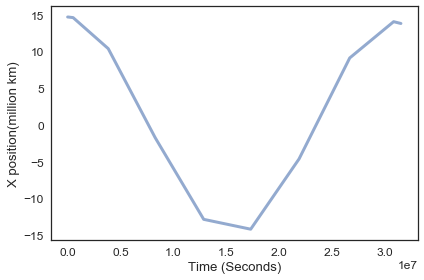

In [29]:
plot(results.index, x)

decorate(xlabel='Time (Seconds)',
         ylabel='X position(million km)')

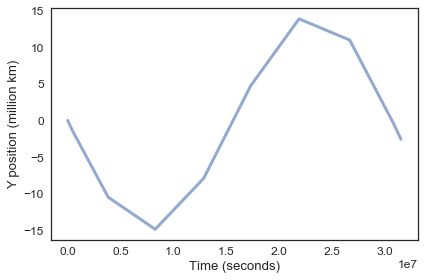

In [30]:
plot(results.index, y)

decorate(xlabel='Time (seconds)',
         ylabel='Y position (million km)')

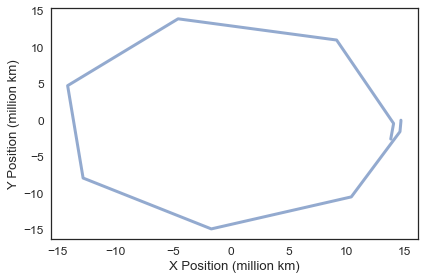

In [31]:
plot(x, y)

decorate(xlabel='X Position (million km)',
         ylabel='Y Position (million km)')

In [32]:
help(solve_ivp)

Help on function solve_ivp in module scipy.integrate._ivp.ivp:

solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, **options)
    Solve an initial value problem for a system of ODEs.
    
    This function numerically integrates a system of ordinary differential
    equations given an initial value::
    
        dy / dt = f(t, y)
        y(t0) = y0
    
    Here t is a one-dimensional independent variable (time), y(t) is an
    n-dimensional vector-valued function (state), and an n-dimensional
    vector-valued function f(t, y) determines the differential equations.
    The goal is to find y(t) approximately satisfying the differential
    equations, given an initial value y(t0)=y0.
    
    Some of the solvers support integration in the complex domain, but note that
    for stiff ODE solvers, the right-hand side must be complex-differentiable
    (satisfy Cauchy-Riemann equations [11]_). To solve a problem in the complex
    doma

In [33]:
results1, details1 = run_ode_solver(system, slope_func, method = 'RK23')
details

,values
sol,None
t_events,[]
nfev,152
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [36]:
# Scaling the distance to  million km

x1 = results1.x / 10e9
y1 = results1.y / 10e9

0.000000e+00    0.000000e+00
4.662755e-08   -1.414214e-13
5.129030e-07   -1.555635e-12
5.175658e-06   -1.569777e-11
5.180321e-05   -1.571191e-10
5.180787e-04   -1.571333e-09
5.180834e-03   -1.571347e-08
5.180838e-02   -1.571348e-07
5.180839e-01   -1.571348e-06
5.180839e+00   -1.571348e-05
5.180839e+01   -1.571348e-04
5.180839e+02   -1.571348e-03
5.180839e+03   -1.571348e-02
5.180839e+04   -1.571319e-01
4.425382e+05   -1.340391e+00
1.240505e+06   -3.722441e+00
2.364216e+06   -6.896605e+00
3.759006e+06   -1.032228e+01
5.354553e+06   -1.322864e+01
6.755323e+06   -1.467129e+01
7.823221e+06   -1.500609e+01
8.895693e+06   -1.466847e+01
1.001631e+07   -1.361939e+01
1.144464e+07   -1.134787e+01
1.310271e+07   -7.634889e+00
1.461687e+07   -3.549662e+00
1.578422e+07   -1.749405e-01
1.695980e+07    3.232149e+00
1.813538e+07    6.473227e+00
1.957914e+07    9.982057e+00
2.123906e+07    1.303723e+01
2.272473e+07    1.461546e+01
2.384448e+07    1.498036e+01
2.497502e+07    1.459982e+01
2.610557e+07  

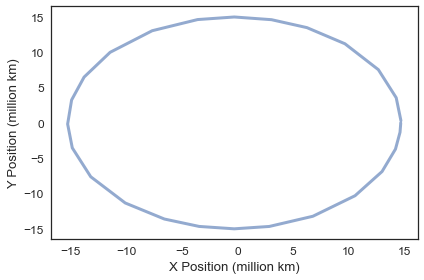

In [37]:
plot(x1, y1)

decorate(xlabel='X Position (million km)',
         ylabel='Y Position (million km)')